In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))



C:\Users\Sumit Kaushik\AppData\Local\Temp\ipykernel_18856\3897234545.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
# Importing the Data Set
df_adult_eda = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv")
df_adult_eda.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df_adult_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Removing any space in the names of the columns
df_adult_eda.columns = df_adult_eda.columns.str.replace(' ', '')
df_adult_eda.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
print(df_adult_eda.shape)

# Dropping the duplicate Rows
df_adult_eda = df_adult_eda.drop_duplicates(keep = 'first')
df_adult_eda.shape

(32560, 15)


(32536, 15)

In [8]:
df_adult_eda.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
# Checking the null values in the columns
df_adult_eda.isnull().sum(axis = 0)

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [13]:
# This Code will Count the occuring of the '?' in all the columns
for i in df_adult_eda.columns:
    t = df_adult_eda[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in Age
0
The Value Counts of ? in Workclass
0
The Value Counts of ? in Fnlwgt
0
The Value Counts of ? in Education
0
The Value Counts of ? in Education_num
0
The Value Counts of ? in Marital_status
0
The Value Counts of ? in Occupation
0
The Value Counts of ? in Relationship
0
The Value Counts of ? in Race
0
The Value Counts of ? in Sex
0
The Value Counts of ? in Capital_gain
0
The Value Counts of ? in Capital_loss
0
The Value Counts of ? in Hours_per_week
0
The Value Counts of ? in Native_country
0
The Value Counts of ? in Income
0


In [15]:
# Dropping the rows whose occupation is '?' 
df_adult_eda = df_adult_eda[df_adult_eda.Occupation != '?']

df_adult_eda['Occupation'].value_counts()

Occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [16]:
# The minimum age of the person
df_adult_eda.at[df_adult_eda['Age'].idxmin(),'Age']

17

C:\Users\Sumit Kaushik\AppData\Local\Temp\ipykernel_18856\3978978278.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_adult_eda['Age'], bins = 90, color = 'mediumslateblue')
C:\Users\Sumit Kaushik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


The maximum age is 90
The minimum age is 17


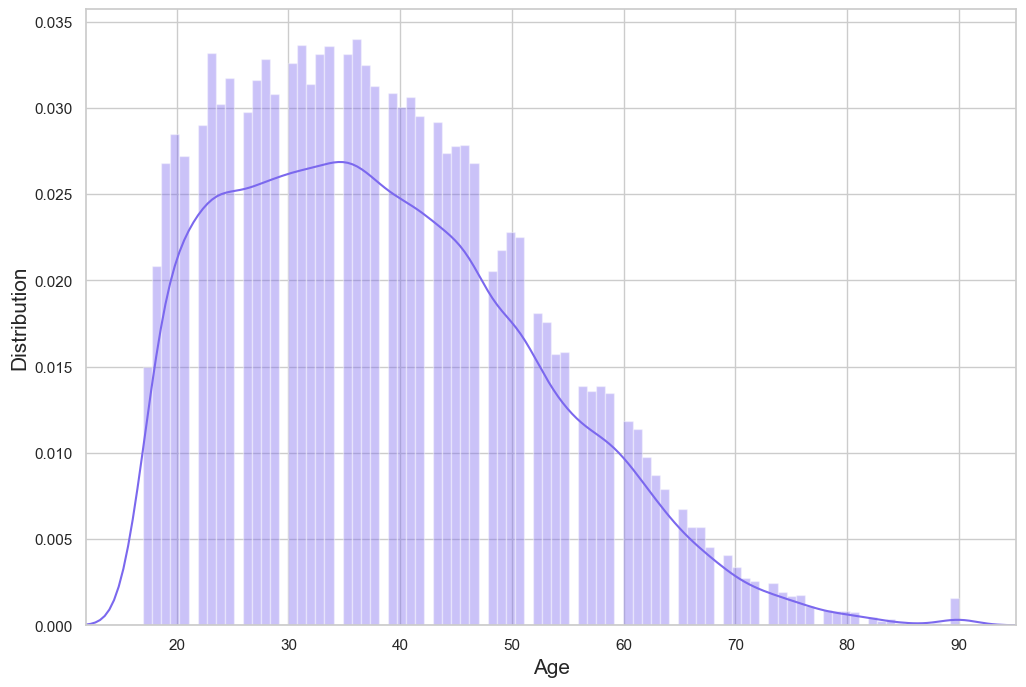

In [17]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df_adult_eda['Age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df_adult_eda['Age'].max())
print ("The minimum age is", df_adult_eda['Age'].min())

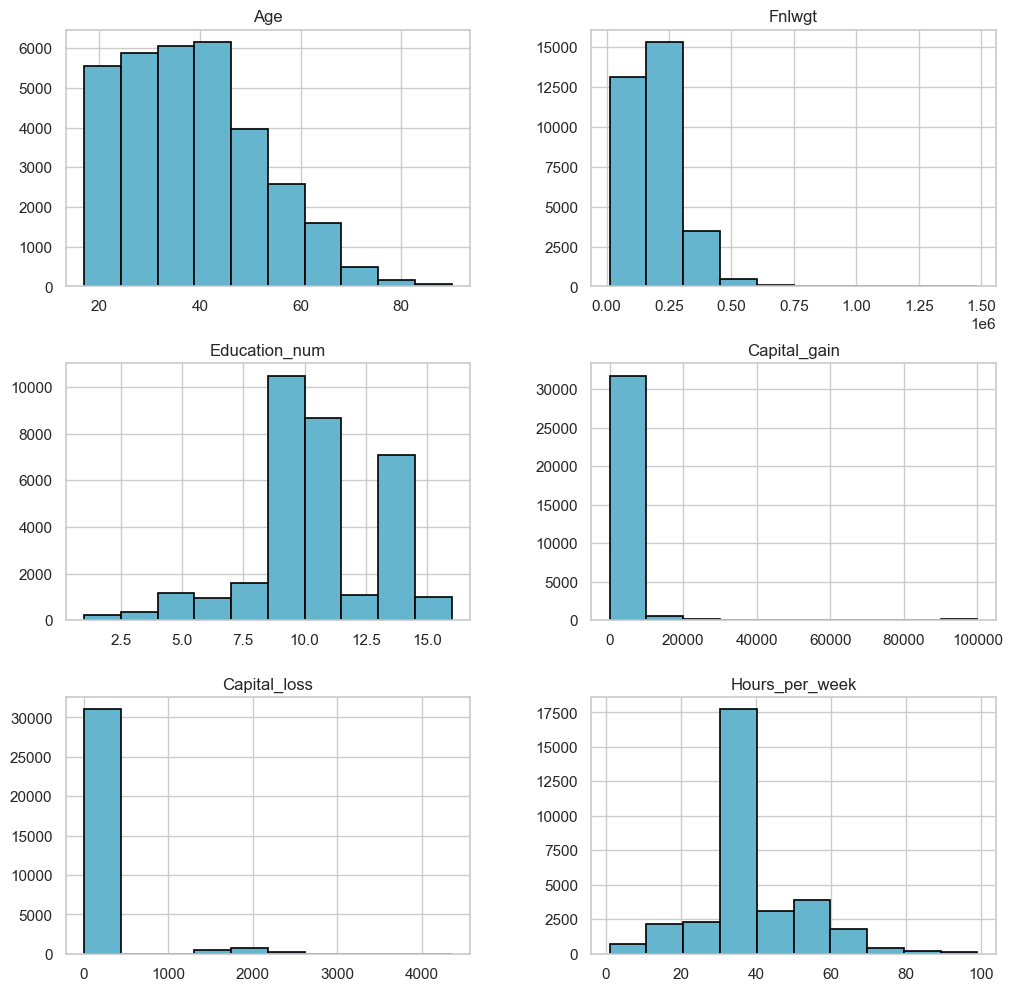

In [18]:
# Distribution of Different Features of the Dataset
distribution = df_adult_eda.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [26]:
# Checking the Difference between the values of the mean and median to get an idea about the amount of outliers
print (df_adult_eda['Hours_per_week'].median())
print (df_adult_eda['Hours_per_week'].mean())

40.0
40.440343004671746


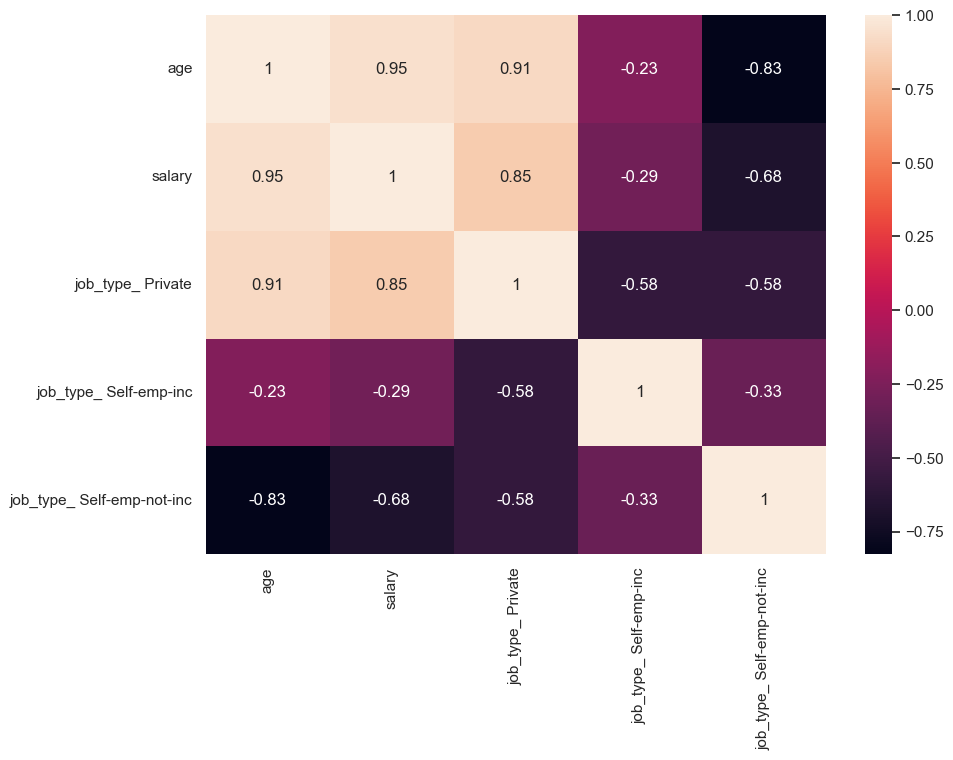

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame with mixed data types
df_adult_eda = pd.DataFrame({
    'age': [25, 45, 35, 50],
    'salary': [50000, 60000, 55000, 70000],
    'job_type': [' Self-emp-not-inc', ' Private', ' Self-emp-inc', ' Private']
})

# Convert categorical data to numeric using one-hot encoding
df_encoded = pd.get_dummies(df_adult_eda)

# Calculate correlation matrix and plot heatmap
plt.rcParams['figure.figsize'] = [10, 7]
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()


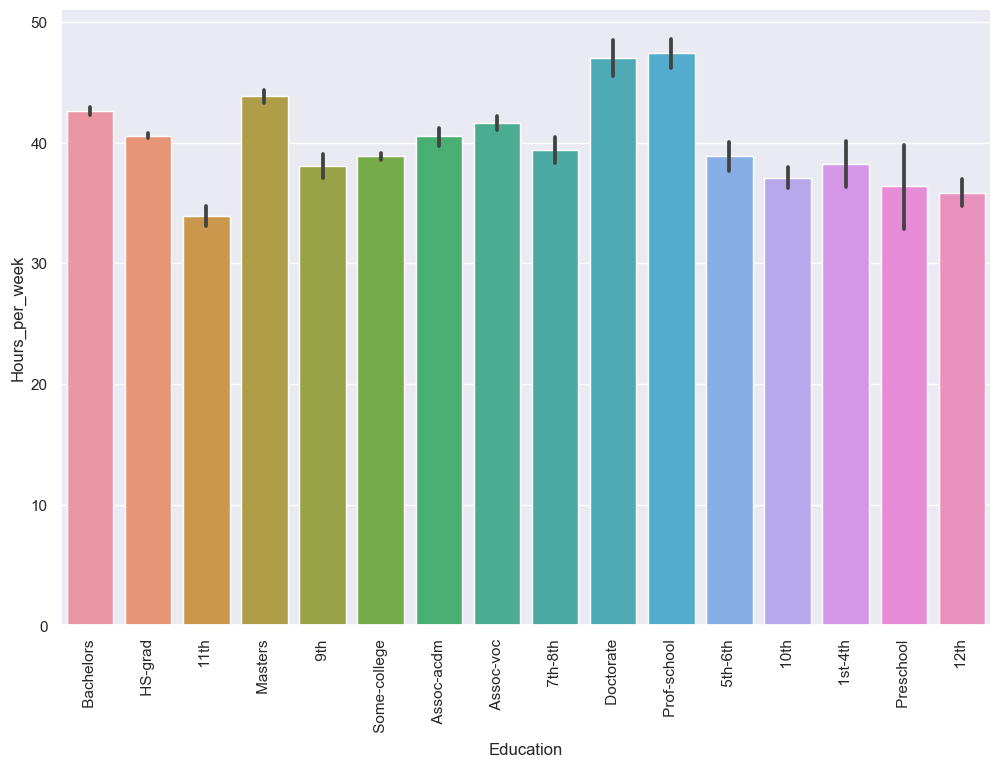

In [28]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df_adult_eda['Education'], y = df_adult_eda['Hours_per_week'], data = df_adult_eda)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

In [43]:
df_adult_eda.head()

,age,salary,job_type
0,25,50000,Self-emp-not-inc
1,45,60000,Private
2,35,55000,Self-emp-inc
3,50,70000,Private


In [50]:
# Check column names
print(df_adult_eda.columns)

# Adjust column name if necessary
df_adult_eda.columns = df_adult_eda.columns.str.strip()  # Remove any leading/trailing whitespace
df_adult_eda.rename(columns={'Native-country': 'Native_country'}, inplace=True)  # Example renaming

# Filter out rows where 'Native_country' is '?'
df_adult_eda_ = df_adult_eda[df_adult_eda['Native_country'] != '?']

# Group by 'Native_country' and income
native_more = df_adult_eda_.loc[df_adult_eda_['income'] == '>50K', ['Native_country']].groupby('Native_country').size()
native_less = df_adult_eda_.loc[df_adult_eda_['income'] == '<=50K', ['Native_country']].groupby('Native_country').size()

print(native_more)
print(native_less)


Index(['age', 'salary', 'job_type'], dtype='object')


KeyError: 'Native_country'

In [51]:
# Checking which Countries are not in the list
[country for country in index_less if country not in index_more]

NameError: name 'index_less' is not defined

In [52]:
# Making DataFrames of the Data
df_more = pd.DataFrame({'Countries' : index_more, '>50K' : list(native_more) })
df_less = pd.DataFrame({'Countries' : index_less, '<=50K' : list(native_less) })

# Adding the entries of the missing countries
df_more.loc[40] = 'Holand-Netherlands', 0
df_more.loc[41] = 'Outlying-US(Guam-USVI-etc)', 0

df_more

NameError: name 'index_more' is not defined